# Deep Neural Network
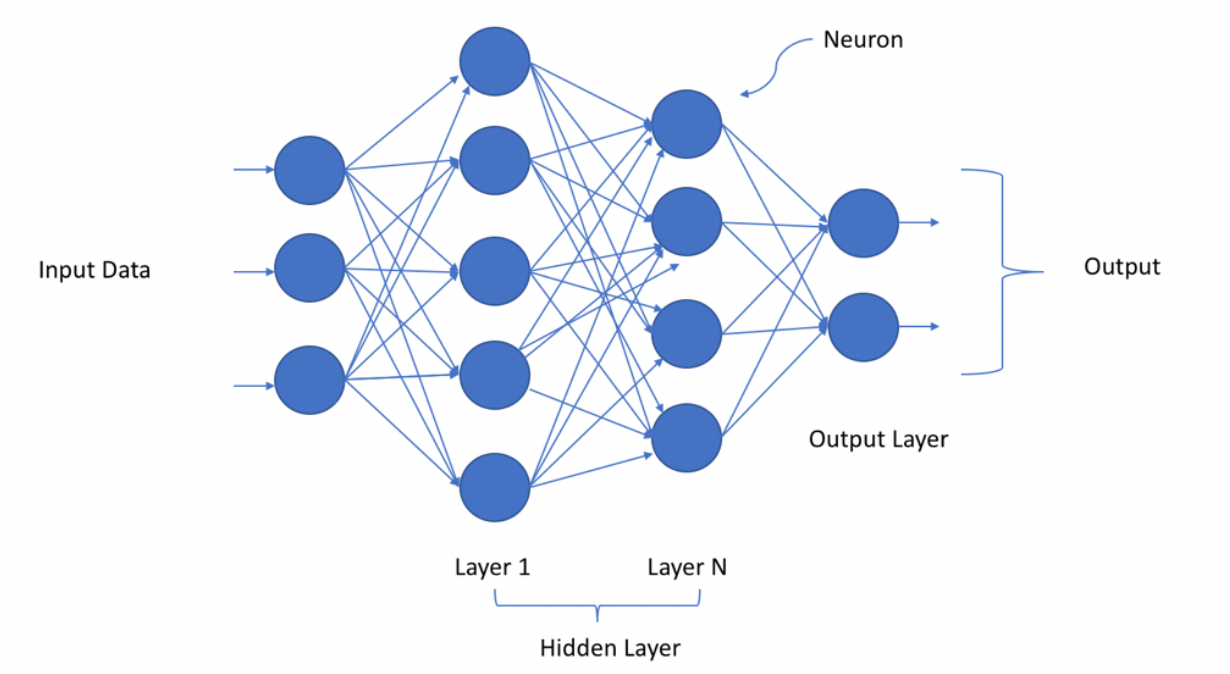

# Overview
A deep neural network (DNN) is a type of machine learning model that consists of multiple layers of interconnected neurons. 

The algorithm of a deep neural network involves several stages. First, the input data is fed into the network, which then passes through a series of layers, each of which performs a nonlinear transformation on the input data. Each layer consists of a set of neurons, which are connected to the neurons in the previous layer. The weights and biases of these connections are adjusted during the training process to minimize the loss function, which measures the difference between the predicted and actual output.

During the training process, the network uses an optimization algorithm, such as gradient descent, to adjust the weights and biases of the neurons in the network in order to minimize the loss function. The backpropagation algorithm is used to compute the gradient of the loss function with respect to the weights and biases of the network, which is then used to update the weights and biases in the opposite direction of the gradient, i.e., towards the direction that reduces the loss function.

# Advantage

1. Can learn complex features and representations from the input data, especially in image and speech recognition, where the input data is high-dimensional and contains a large number of features

# Disadvantage

1. Computationally expensive to train, particularly when dealing with large datasets and complex architectures. 
2. Require large amounts of labeled training data to achieve good performance.

# Data
Fashion-MNIST is a dataset of images used for classification tasks in machine learning. It consists of 70,000 grayscale images of size 28x28 pixels, with 60,000 images used for training and 10,000 images used for testing. Each image is associated with a label indicating the type of clothing or accessory it represents, such as T-shirt/top, dress, sneaker, or handbag. There are a total of 10 classes in the dataset.
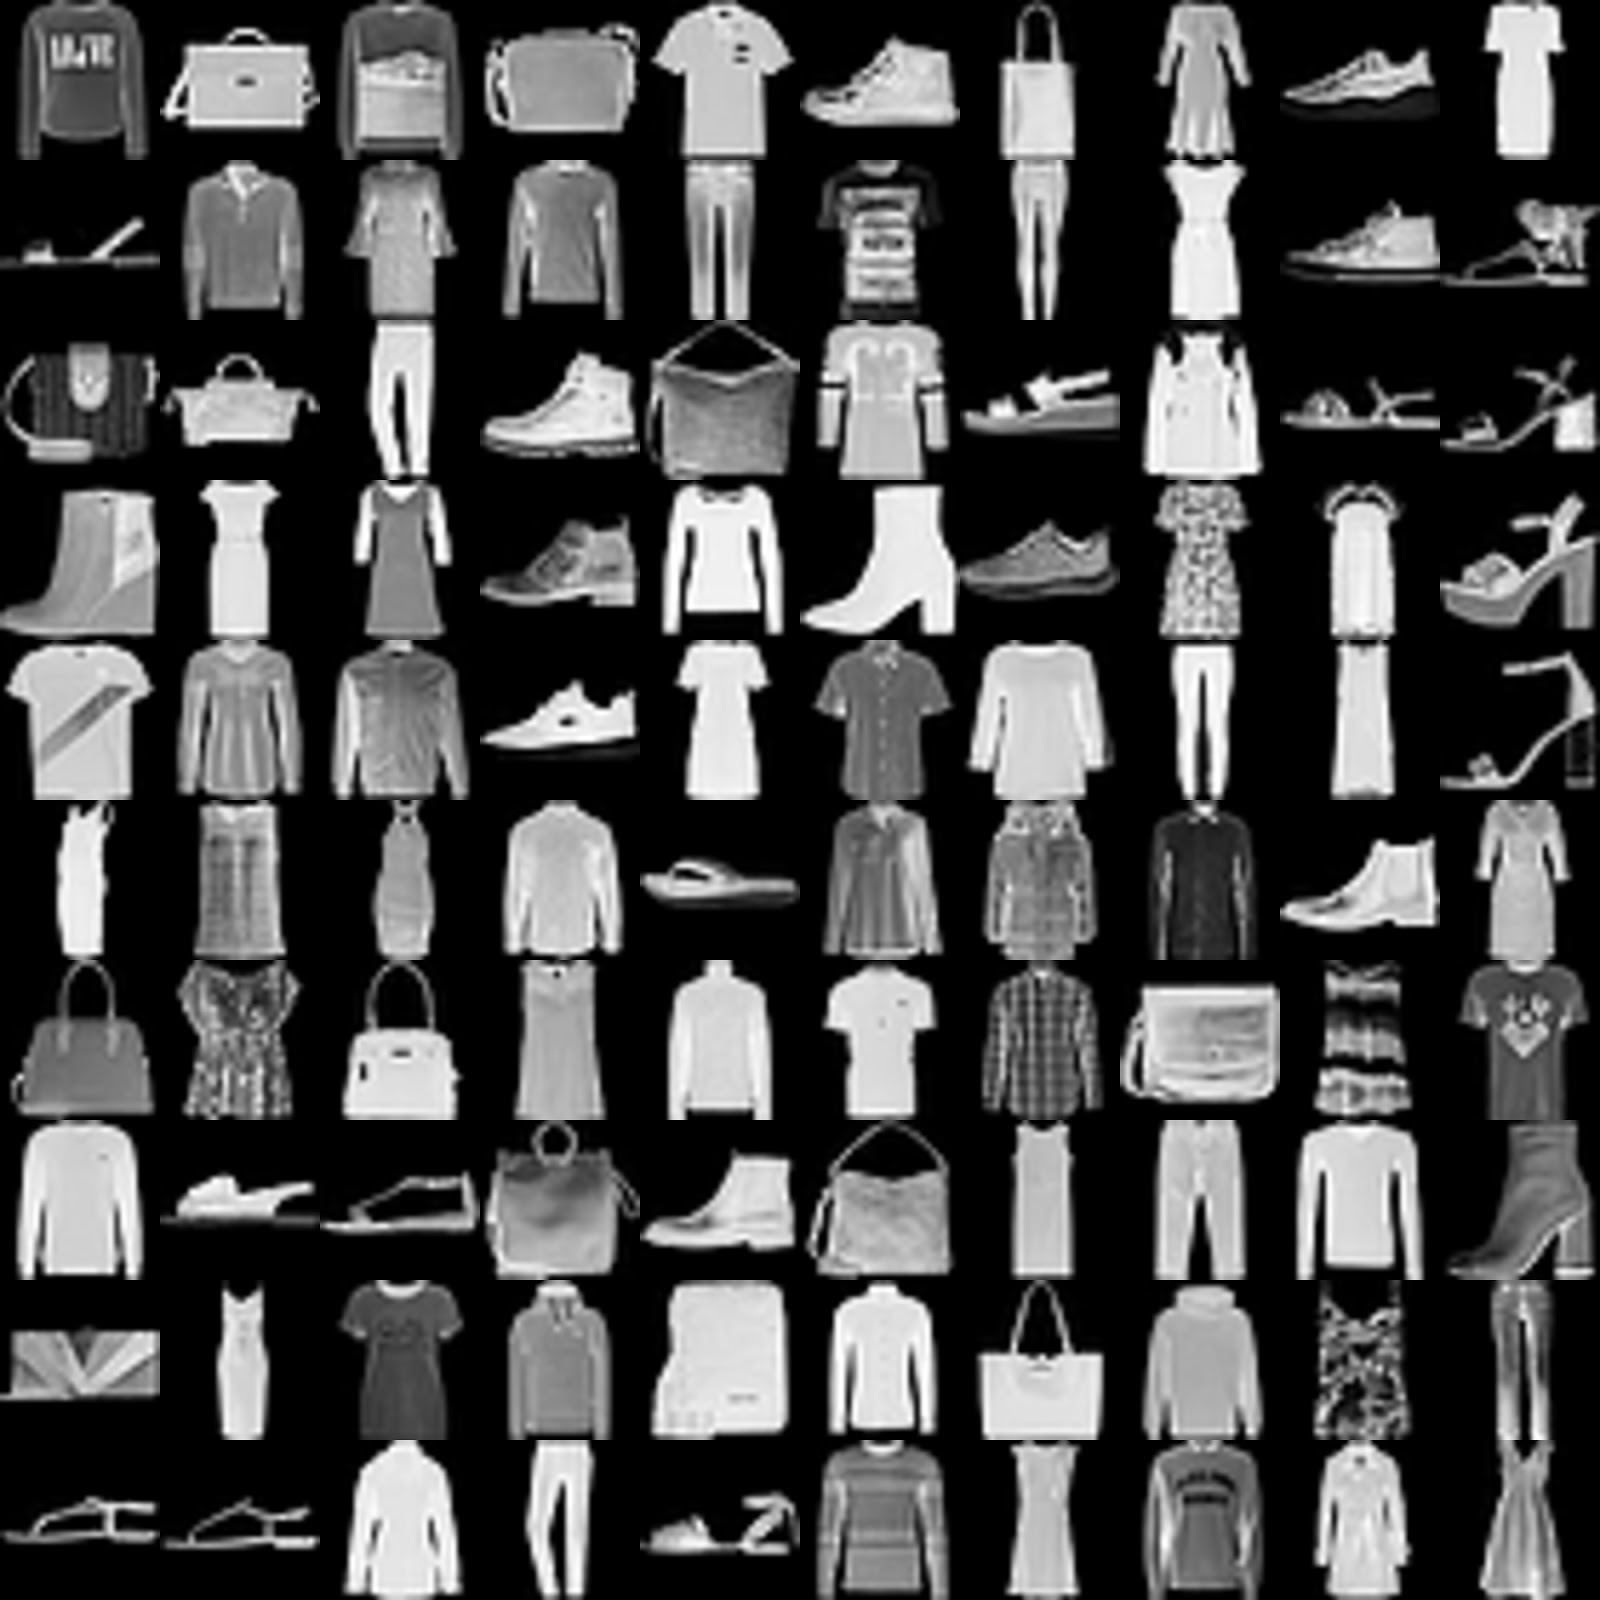

In [28]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

We can import the fasion mnist data directly from keras. 

In [29]:
(train_X, train_y), (test_X, test_y) = keras.datasets.fashion_mnist.load_data()

# View data structure and shape 
print(np.shape(train_X))
print(np.shape(train_y))

(60000, 28, 28)
(60000,)


We can view one boot image from dataset

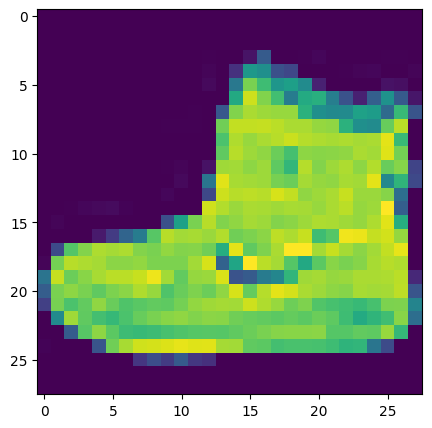

In [30]:
image_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6, 5))
plt.imshow(train_X[0])
plt.show()

We can also view the first 10 images

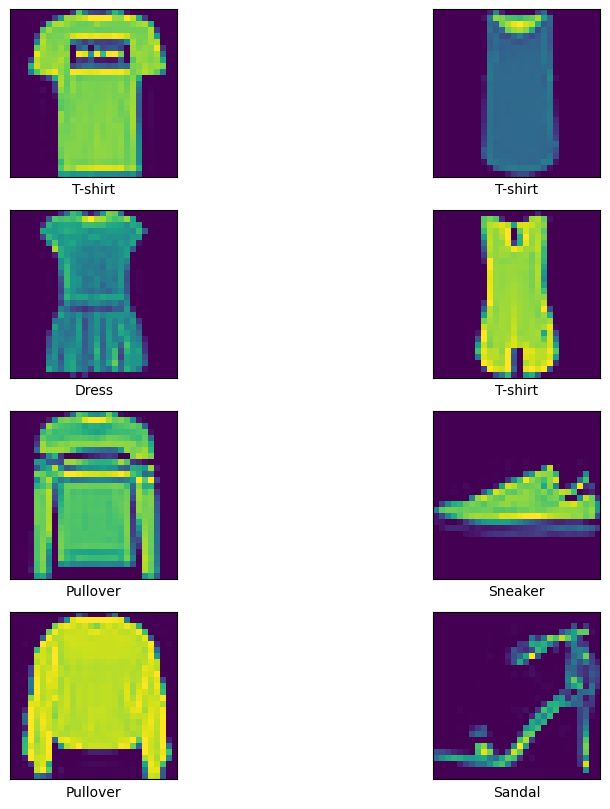

In [31]:
plt.figure(figsize=(10, 10))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_X[i])
    plt.xlabel(image_name[train_y[i]])
plt.show()

In dense neural networks, feature vectors are fed into the first layer of the network as column vectors. This layer is often called the 0-th layer and is similar to the layer in single neuron models. However, when working with image data, we must first flatten the image matrices into column vectors in order to feed them into the network.

In [32]:
# Scale the data for training. 
train_X = train_X/255
test_X = test_X/255

# Flatten 2D data into 1D data for training
def flatten(X_data, Y_data):
    flat_X = []
    onehot_encode_Y = []
    for x, y in zip(X_data, Y_data):
        # Flatten to 784 because 28 x 28 = 784
        flat_X.append(x.flatten().reshape(784, 1))
        # Create an empty 0 vector because of 10 label then fill 1 in at one position
        vector = np.zeros((10, 1))
        vector[y][0] = 1.0
        onehot_encode_Y.append(vector)
    return flat_X, onehot_encode_Y

[flat_train_X, onehot_encode_train_Y] = flatten(train_X, train_y)
[flat_test_X, onehot_encode_test_Y] = flatten(test_X, test_y)

We create our sigmoid activation function, its derivative, and initialize the weight and bias  vectors for a deep neural network.

In [33]:
# Activation is sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))       

# Create a neural network with 3 layers:
# 1st layer has 784 input nodes
# 2nd layer has 128 nodes
# 3rd and final layer has 10 output nodes
def init_weights(layers = [784, 128, 10]):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        scaling_factor = np.sqrt(2/layers[i-1])
        W.append(scaling_factor * np.random.randn(layers[i], layers[i-1]))  
        B.append(scaling_factor * np.random.randn(layers[i], 1))
    return W, B

[W, B] = init_weights(layers = [784, 128, 10])

We can check shape of W and B to ensure it is as expected

In [34]:
print(np.shape(W[0]))
print(np.shape(W[1]))
print(np.shape(B[2]))
print(np.shape(B[0]))
print(np.shape(W[1]))
print(np.shape(B[2]))

(1,)
(128, 784)
(10, 1)
(1,)
(128, 784)
(10, 1)


We write a forward pass function which refers to the process of propagating input data through the network to generate a prediction. This involves multiplying the input data by the weights of each layer, applying an activation function, and passing the result to the next layer. 

WE also define a MSE (Mean Squared Error) function which is a common loss function used in deep neural networks to measure the difference between the predicted output and the true output for a given input. The MSE is calculated by taking the squared difference between each predicted output value and its corresponding true value, then averaging over all the values in the output vector. The goal of training is to minimize the MSE loss over the training set, which is typically done using backpropagation and gradient descent.

In [39]:
# Try make a forward pass
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    for i in range(1, len(W)):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        a = sigmoid(z)
        A.append(a)   
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

# Computes the error over an entire set of features and labels
def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost = cost + mse(a, yi)
        m = m + 1
    return cost/m

We can try predict one random image before doing any propagation.

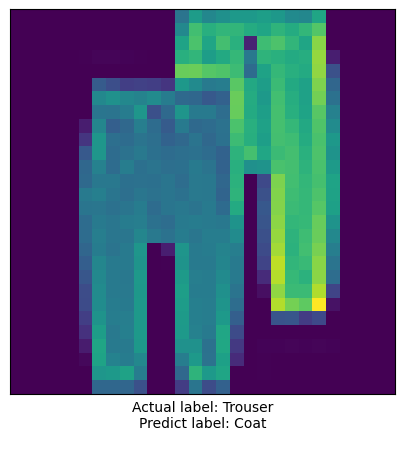

In [36]:
i = np.random.randint(len(flat_train_X))
actual_label = image_name[np.argmax(onehot_encode_train_Y[i])]
predict_label = image_name[np.argmax(forward_pass(W, B, flat_train_X[i], predict_vector=True))]
MSE = MSE(W, B, flat_train_X, onehot_encode_train_Y)
plt.figure(figsize=(6, 5))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(train_X[i])
plt.xlabel("Actual label: " + actual_label + "\n" + 
           "Predict label: " + predict_label + "\n" )
plt.show()

As expected, our prediction is wrong, the actual label is trouser but our pre-trained model predict it as coat. This shows that we need propagation to optimize our weight and bias. We create a Python class for a deep neural network  that stores scaling, epochs, and weights. It includes training, input, and predict methods for classification.

In [40]:
class NeuralNetwork(object):
    def __init__(self, layers):
        self.layers = layers
        self.W, self.B = init_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.05, epochs = 4):
        # Initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        # Number of non-input layers.
        L = len(self.layers) - 1 
        for k in range(epochs):
            for xi, yi in zip(X_train, y_train):
                Z, A = forward_pass(self.W, self.B, xi)
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas = dict()
                deltas[L] = output_error
                # Compute node errors at each hidden layer
                for i in range(L-1, 0, -1):
                    deltas[i] = (self.W[i+1].T @ deltas[i+1]) * d_sigmoid(Z[i])
                # Iterate over each hidden layer and the output layer to perform gradient descent
                for i in range(1, L+1):
                    self.W[i] = self.W[i] - alpha*deltas[i] @ A[i-1].T
                    self.B[i] = self.B[i] - alpha*deltas[i]
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))    

    def predict(self, xi):
        predict_label = image_name[np.argmax(forward_pass(self.W, self.B, xi, predict_vector=True))]
        return predict_label

We create an instance of the neural network class and train this instance.

In [41]:
neuralnetwork = NeuralNetwork(layers = [784, 128, 64, 10])
neuralnetwork.train(flat_train_X, onehot_encode_train_Y)
x_axis = range(1, len(neuralnetwork.errors_)+1)
y_axis = neuralnetwork.errors_

We can visualize the errors of our model over epoches.

[Text(0.5, 1.0, 'Errors over epochs'),
 Text(0.5, 0, 'Number of epochs'),
 Text(0, 0.5, 'MSE')]

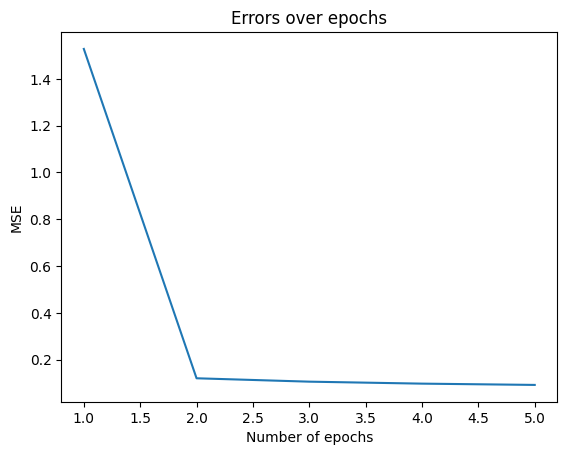

In [42]:
sns.lineplot(x=x_axis, y=y_axis).set(title='Errors over epochs', 
                                         xlabel='Number of epochs', 
                                         ylabel='MSE')

We pick a couple of some images to test our model predictions.

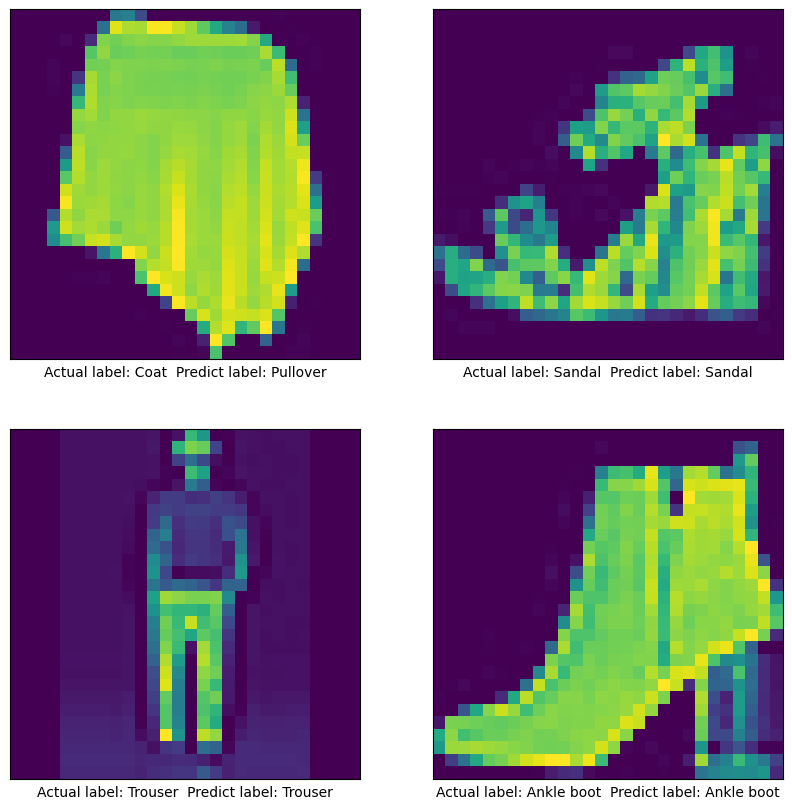

In [46]:
list_i = np.random.randint(len(test_X), size=(8))
actual_labels = []
predict_labels = []
for i in list_i:
    actual_labels.append(image_name[test_y[i]])
    predict_labels.append(neuralnetwork.predict(flat_test_X[i]))
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_X[list_i[i]])
    plt.xlabel("Actual label: " + actual_labels[i] + "  Predict label: " + predict_labels[i])
plt.show()

It seems like our model prediction is not accurate. The model only predicts the ankle boot and sandals as accurate while the rest are wrong prediction. We can visualize how our model performs on each data label.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sneaker'),
  Text(1, 0, 'Bag'),
  Text(2, 0, 'Trouser'),
  Text(3, 0, 'Ankle boot'),
  Text(4, 0, 'Sandal'),
  Text(5, 0, 'Dress'),
  Text(6, 0, 'Coat'),
  Text(7, 0, 'T-shirt'),
  Text(8, 0, 'Pullover'),
  Text(9, 0, 'Shirt')])

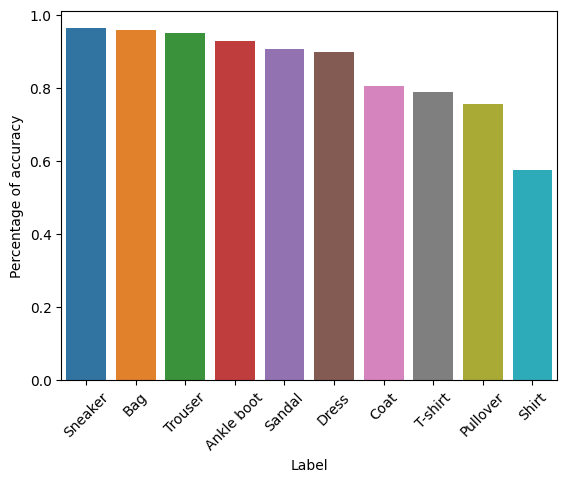

In [48]:
labels_correct = np.zeros((10, 1))
for i in range(0,len(onehot_encode_test_Y)):
    if image_name[test_y[i]] == neuralnetwork.predict(flat_test_X[i]):
        labels_correct[test_y[i]][0] = labels_correct[test_y[i]][0] + 1.0
labels_correct = labels_correct/1000
label_df = pd.DataFrame({'Percentage of accuracy': labels_correct.flatten(),
                         'Label': image_name})
label_df = label_df.sort_values('Percentage of accuracy', ascending = False)
sns.barplot(data=label_df, x="Label", y="Percentage of accuracy") 
plt.xticks(rotation=45)

# Conclusion,
Our model performs better when the fashion item is sneaker, bag or trouser, while it performs much worse in t-shirt, pullover, and shirt, due to how similar the latter are to each other. Fashion-MNIST was created as a replacement for the original MNIST dataset, which had become too easy for modern machine learning algorithms to classify accurately, and provides a more challenging classification task as we see here.